In [24]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

import matplotlib.patches as patches

### Python Test Assignment

1. Open the file test.fits in Python.  
2. Crop a 40x40 pixel region around the brightest star in the image.  
3. Save the cropped region as test2.fits.
4. Use the code *photutils* to measure the centroid of this star in the uncropped region

But DS9 can do all of thisss

#### 2. Crop a 40x40 pixel region around the brightest star in the image.  

17760.541


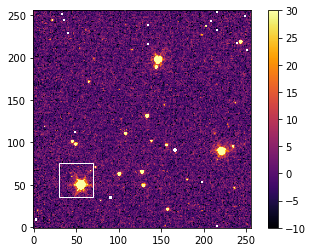

In [50]:
# hdu = fits.open('test.fits')
# im = hdu[0].data
cropsize = 40 #pixels

fluxes = fits.getdata('test.fits')
maxflux = np.nanmax(np.ravel(im))
im = fits.getdata('test.fits', ext=0)
print(maxflux)
xmax = np.where(fluxes==maxflux)[0][0]
ymax = np.where(fluxes==maxflux)[1][0]

fig, ax = plt.subplots()
rect = patches.Rectangle((xmax-cropsize/2, ymax-cropsize/2), cropsize, cropsize, 
                         linewidth=1, edgecolor='w', facecolor='none')
ax.add_patch(rect)
plt.imshow(im, cmap='inferno', origin='lower', vmin=-10,vmax=30)
#couldn't find the right flux range so had to look at the solution for that.
#Assuming high flux pts were cosmic rays, was this not drizzled?
plt.colorbar()   
plt.show()

#### 3. Save the cropped region as test2.fits.


In [47]:
cropped = im[(xmax-cropsize/2):(xmax+cropsize/2),(ymax-cropsize/2):(ymax-cropsize/2)]
fits.writeto('test2.fits',cropped,overwrite=True)

In [49]:
from photutils import centroids

55.765325893080984 50.3005899586153


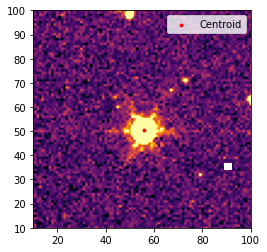

In [63]:
center = centroids.centroid_sources(fluxes,xmax,ymax,box_size=40)
xcenter = center[0][0]
ycenter = center[1][0]
print(xcenter,ycenter)
plt.figure()
plt.imshow(im, cmap='inferno', origin='lower', vmin=-10,vmax=30)
plt.xlim((10,100))
plt.ylim((10,100))
plt.scatter(xcenter,ycenter,color='r',s=8,label='Centroid')
plt.legend()
plt.show()